## Question E
Build a multi-layer perceptron with your own design.  Experiment with the layers, size of each layer, and different activation functions.

### Question E.1
[5] Describe your network clearly with markdown.

#### Number of Layers: 10
#### Output Size of Each Layer: 1 - 100, Layer 2 - 100, Layer 3 - 100, Layer 4 - 100, 5 - 100, Layer 6 - 100, Layer 7 - 100, Layer 8 - 100, Layer 9 - 100, Layer 10 - 10
#### Activation Function of Each Layer: Rectified Linear Activation

### Question E.2
[10] Build the model using TensorFlow.  Use the same cross-validation as in (B) and (D).

In [30]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [35]:
tf.reset_default_graph()

numPixels = 784
layerOutput = 50
numClassifications = 10

# Initial input
x = tf.placeholder(tf.float32, [None, numPixels])
# Reference
ref = tf.placeholder(tf.float32, [None, numClassifications])

logits1 = tf.layers.dense(inputs=x, units=layerOutput, activation=None, name="L1")
logits2 = tf.layers.dense(inputs=logits1, units=layerOutput, activation=None, name="L2")
logits3 = tf.layers.dense(inputs=logits2, units=layerOutput, activation=None, name="L3")
logits4 = tf.layers.dense(inputs=logits3, units=layerOutput, activation=None, name="L4")
logits5 = tf.layers.dense(inputs=logits4, units=layerOutput, activation=None, name="L5")
logits6 = tf.layers.dense(inputs=logits5, units=layerOutput, activation=None, name="L6")
logits7 = tf.layers.dense(inputs=logits6, units=layerOutput, activation=None, name="L7")
logits8 = tf.layers.dense(inputs=logits7, units=layerOutput, activation=None, name="L8")
logits9 = tf.layers.dense(inputs=logits8, units=layerOutput, activation=None, name="L9")
logits10 = tf.layers.dense(inputs=logits9, units=numClassifications, activation=None, name="L10")

# Calculate the cross entropy, doing the softmax function internally
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits10, labels=ref)

# Take the average of the cross entropy values
cost = tf.reduce_mean(cross_entropy)

# (N). Take the highest percentile value in the prediction as the answer
prediction = tf.argmax(tf.nn.softmax(logits10), axis=1)

labels = []
for label in mnist.test.labels:
    labels.append(np.argmax(label))
labels = np.array(labels)

rate = 0.01
epochs = 100
iterationsPerEpoch = 10

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
s = tf.Session()
s.run(tf.global_variables_initializer())

errList = []
validationErrList = []
epochList = []
inputData, correctAns = mnist.train.next_batch(100)
validationInput, validationCorrect = mnist.train.next_batch(100)

count = 0
for _ in range(epochs):
    inputData, correctAns = mnist.train.next_batch(100)
    validationInput, validationCorrect = mnist.train.next_batch(100)
    for _ in range(iterationsPerEpoch):
        # Do the training
        err, _ = s.run((cost, optimizer), feed_dict={x: inputData, ref: correctAns})

        # Do the validation
        validationErr = s.run((cost), feed_dict={x: validationInput, ref: validationCorrect})
        validationErrList.append(validationErr)
                
        errList.append(err)
        epochList.append(count)
        count += 1

print("DONE")

DONE


### Question E.3
[5] Plot the training error.

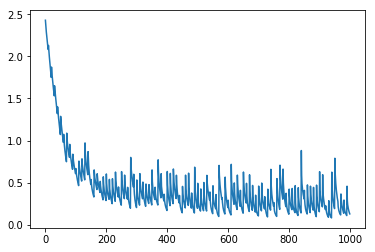

In [36]:
plt.plot(epochList, errList);
plt.show()

### Question E.4
[5] Plot the cross-validation error over the epochs. Is there overfitting?

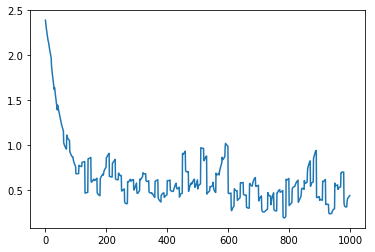

In [37]:
plt.plot(epochList, validationErrList);
plt.show()

There is significant overfitting which can be seen by how large the spikes are. Jumping between error rates of low 0.3 to nearly 0.8 quite frequently.

### Question E.5
[5] Report the test error, and compare with (B.4) and (D.4).  Comment on your observation.

In [38]:
# Check the test error
predic = s.run((prediction), feed_dict={x: mnist.test.images})
answers = np.equal(labels, predic)
corrGuesses = np.sum(answers)
testErr = corrGuesses / len(answers)   
print("The test error for the final iteration of the training is: " + str((1 - testErr) * 100) + " percent.")

The test error for the final iteration of the training is: 13.24 percent.


The test error for the final iteration of the training is actually larger than D.4. This would make sense to a degree since significant overfitting can be seen in the cross validation graph.